In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from zipfile import ZipFile

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!unzip "drive/My Drive/train.csv.zip" -d "drive/My Drive/"

Archive:  drive/My Drive/train.csv.zip
replace drive/My Drive/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: drive/My Drive/train.csv  


In [ ]:
train_df = pd.read_csv('drive/My Drive/train.csv')

train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['date']

0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
3000883   2017-08-15
3000884   2017-08-15
3000885   2017-08-15
3000886   2017-08-15
3000887   2017-08-15
Name: date, Length: 3000888, dtype: datetime64[ns]

# EDA

In [ ]:
train_df.shape

(3000888, 6)

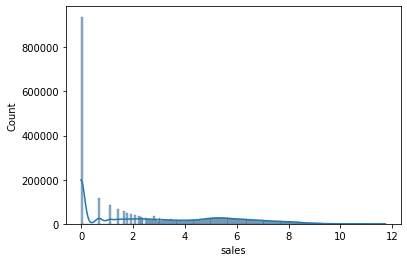

In [ ]:
sns.histplot(np.log1p(train_df['sales']), kde=True)

Text(0.5, 1.0, 'Sales per month by store_nbr')

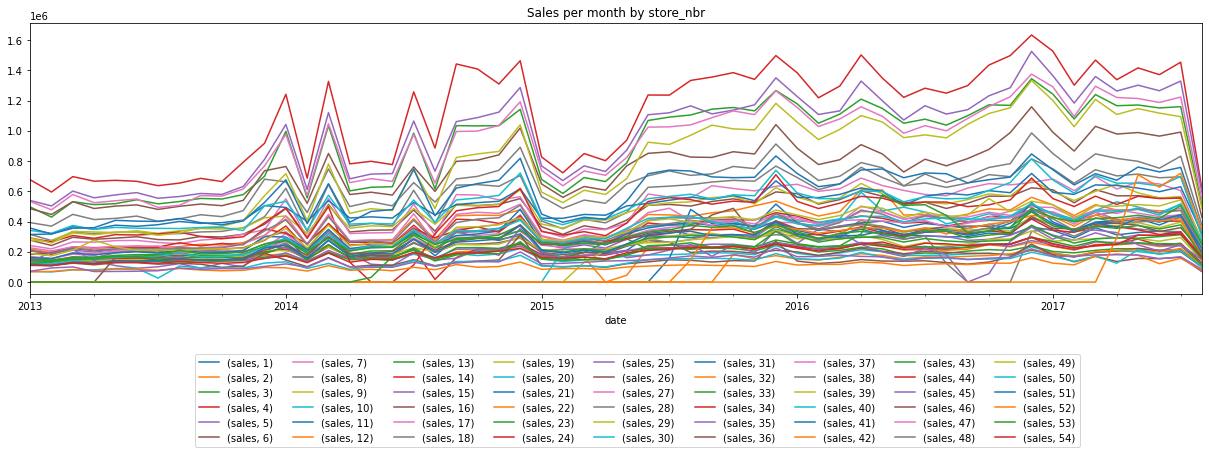

In [ ]:
store_nbr_sales_per_month = train_df.groupby(['date', 'store_nbr']).aggregate({'sales': 'sum'}).unstack().resample('1M').sum()
store_nbr_sales_per_month.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(0.9,-.2), ncol=9)
plt.title("Sales per month by store_nbr")

Text(0.5, 1.0, 'Sales per month by family')

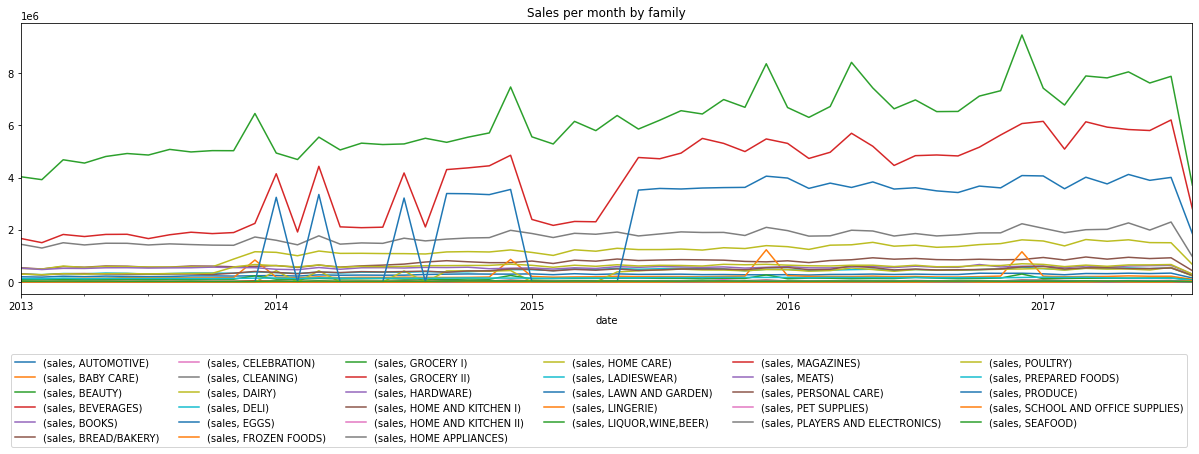

In [ ]:
family_sales_per_month = train_df.groupby(['date', 'family']).aggregate({'sales': 'sum'}).unstack().resample('1M').sum()
family_sales_per_month.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(1, -.2), ncol=6)
plt.title("Sales per month by family")

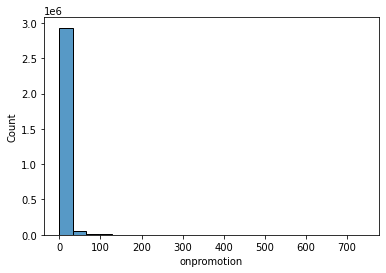

In [ ]:
sns.histplot(data=train_df, x='onpromotion')

In [ ]:
train_df['sales'] = np.log1p(train_df['sales'])

In [ ]:
stores_df = pd.read_csv('drive/My Drive/stores.csv')
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
# stores_df.describe(include=object)

In [ ]:
stores_df.shape

(54, 5)

In [ ]:
!unzip "drive/My Drive/transactions.csv.zip" -d "drive/My Drive/"

Archive:  drive/My Drive/transactions.csv.zip
  inflating: drive/My Drive/transactions.csv  


In [ ]:
transactions_df = pd.read_csv('drive/My Drive/transactions.csv')
transactions_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

In [ ]:
transactions_df.shape

(83488, 3)

Text(0.5, 1.0, 'Transactions per month by store_nbr')

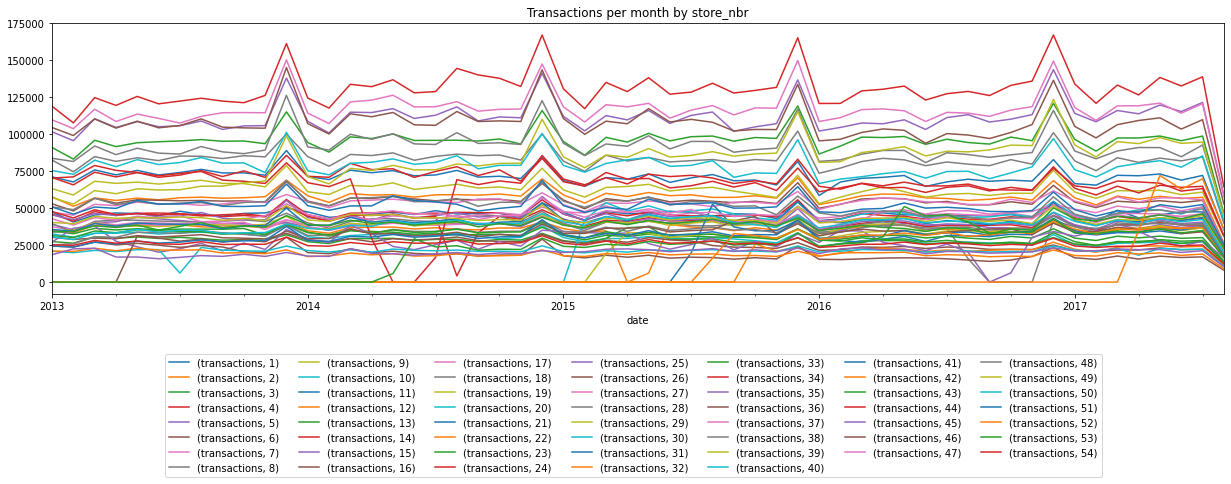

In [ ]:
store_nbr_transactions_per_month = transactions_df.groupby(['date', 'store_nbr']).aggregate({'transactions': 'sum'}).unstack().resample('1M').sum()
store_nbr_transactions_per_month.plot(figsize=(21,5))
plt.legend(bbox_to_anchor=(0.9,-0.2), ncol=7)
plt.title('Transactions per month by store_nbr')

In [ ]:
test_df = pd.read_csv('drive/My Drive/test.csv')
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
test_id = test_df['id']
test_df['date'] = pd.to_datetime(test_df['date'])

In [ ]:
test_df.shape

(28512, 5)

In [ ]:
holidays_df = pd.read_csv('drive/My Drive//holidays_events.csv')
holidays_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holidays_df['date'] = pd.to_datetime(holidays_df['date'])

In [ ]:
holidays_df.shape

(350, 6)

In [ ]:
oil_df = pd.read_csv('drive/My Drive//oil.csv')
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
oil_df['dcoilwtico'].fillna(method='backfill', inplace=True)
oil_df['date'] = pd.to_datetime(oil_df['date'])

In [ ]:
oil_df.shape

(1218, 2)

Text(0.5, 1.0, 'Oil price')

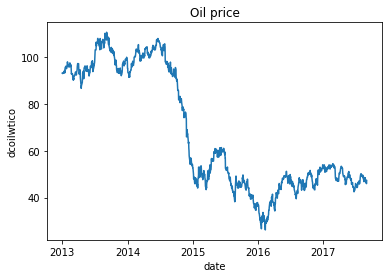

In [ ]:
sns.lineplot(data=oil_df, x='date', y='dcoilwtico')
plt.title('Oil price')

In [ ]:
def lag_features(df, lags):
    for lag in lags:
        df[f"sales_t-{lag}"] = df.groupby(["store_nbr", "family"])["sales"].transform(
            lambda x: x.shift(lag))
    return df

def fill_na(df):
    df['holiday_type'] = df['holiday_type'].fillna('Common')
    df['locale'] = df['locale'].fillna('Common')
    # df['locale_name'] = df['locale_name'].fillna('Unknown')
    df['description'] = df['description'].fillna('Unknown')
    df['transferred'] = df['transferred'].fillna(False)
    df['dcoilwtico'] = df['dcoilwtico'].fillna(method='backfill')
    # df['transactions'] = df['transactions'].fillna(0)
    return df

def merge_data(df):
    df = df \
        .merge(stores_df, left_on="store_nbr", right_on="store_nbr", how="left") \
        .rename(columns={"type": "store_type"}) \
        .merge(transactions_df, left_on=["date", "store_nbr"], right_on=["date", "store_nbr"], how="left") \
        .merge(holidays_df, left_on="date", right_on="date", how="left") \
        .drop_duplicates(subset="id") \
        .rename(columns={"type": "holiday_type"}) \
        .merge(oil_df, left_on="date", right_on="date", how="left") 
    return df

def create_date_features(df):
    df['month'] = df.date.dt.month
    df['day_of_month'] = df.date.dt.day
    df['day_of_year'] = df.date.dt.dayofyear
    df['week_of_year'] = df.date.dt.weekofyear
    df['day_of_week'] = df.date.dt.dayofweek
    df['year'] = df.date.dt.year
    return df

# Random Noise
def random_noise(dataframe):
    return np.random.normal(scale=2.0, size=(len(dataframe),))

def roll_mean_features(dataframe, windows):
    for window in windows:
        dataframe['sales_roll_mean_' + str(window)] = dataframe.groupby(["store_nbr", "family"])['sales']. \
                                                          transform(
            lambda x: x.shift(16).rolling(window=window, min_periods=7, win_type="triang").mean()) + random_noise(
            dataframe)
    return dataframe

def ewm_features(dataframe, alphas, lags):
    for alpha in alphas:
        for lag in lags:
            dataframe['sales_ewm_alpha_' + str(alpha).replace(".", "") + "_lag_" + str(lag)] = \
                dataframe.groupby(["store_nbr", "family"])['sales'].transform(lambda x: x.shift(lag).ewm(alpha=alpha).mean())
    return dataframe

In [ ]:
col = [
    'date',
    'store_nbr', 
    'family', 
    'sales', 
    'onpromotion', 
    'cluster', 
    'holiday_type', 
    'locale', 
    'description', 
    'transferred',
    'dcoilwtico'
]

In [ ]:
all_df = pd.concat([train_df, test_df], axis=0)
all_df = merge_data(all_df)
all_df = all_df[col]
all_df = fill_na(all_df)
all_df = create_date_features(all_df)
all_df = lag_features(all_df, lags = [*range(1, 16), 16,17,18,19,20,21,22,30,31,90,180,364])
all_df = roll_mean_features(all_df,[16,17,18,30])

alphas = [0.95, 0.9, 0.8, 0.5]
lags =[1, 7,30]
all_df = ewm_features(all_df, alphas, lags)

all_df['store_nbr'] = all_df['store_nbr'].astype('category')
all_df['family'] = all_df['family'].astype('category')
all_df['store_nbr'] = all_df['store_nbr'].astype('category')
all_df['cluster'] = all_df['cluster'].astype('category')
all_df['family'] = all_df['family'].astype('category')
all_df['holiday_type'] = all_df['holiday_type'].astype('category')
all_df['locale'] = all_df['locale'].astype('category')
all_df['description'] = all_df['description'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


In [ ]:
all_df.sample(10)

,date,store_nbr,family,sales,onpromotion,cluster,holiday_type,locale,description,transferred,...,sales_ewm_alpha_095_lag_30,sales_ewm_alpha_09_lag_1,sales_ewm_alpha_09_lag_7,sales_ewm_alpha_09_lag_30,sales_ewm_alpha_08_lag_1,sales_ewm_alpha_08_lag_7,sales_ewm_alpha_08_lag_30,sales_ewm_alpha_05_lag_1,sales_ewm_alpha_05_lag_7,sales_ewm_alpha_05_lag_30
1036779,2014-08-06,49,HOME CARE,0.000000,0,11,Common,Common,Unknown,False,...,6.019608e+00,5.593522e-05,5.717652e+00,6.036121e+00,1.793946e-03,5.711488e+00,6.062927e+00,1.765448e-01,5.719134,6.033842e+00
1093818,2014-09-07,5,AUTOMOTIVE,1.791759,0,4,Common,Common,Unknown,False,...,1.585582e+00,1.890213e+00,2.405165e+00,1.564940e+00,1.836367e+00,2.403496e+00,1.532711e+00,1.715301e+00,2.256133,1.511371e+00
2003052,2016-02-02,11,HOME CARE,6.489205,0,6,Common,Common,Unknown,False,...,7.045966e+00,6.530741e+00,5.917206e+00,6.986790e+00,6.526689e+00,5.933913e+00,6.799224e+00,6.425642e+00,5.997314,6.025252e+00
895427,2014-05-19,33,BREAD/BAKERY,5.662960,0,3,Common,Common,Unknown,False,...,5.492005e+00,5.955388e+00,5.675620e+00,5.472794e+00,5.934763e+00,5.683045e+00,5.440978e+00,5.790715e+00,5.678947,5.402433e+00
1071533,2014-08-26,24,MAGAZINES,0.000000,0,1,Common,Common,Unknown,False,...,1.740031e+00,2.061581e-25,2.061581e-19,1.694855e+00,6.556690e-18,1.024483e-13,1.623470e+00,5.246716e-08,0.000003,1.477346e+00
953507,2014-06-21,13,BREAD/BAKERY,4.962845,0,15,Common,Common,Unknown,False,...,4.555484e+00,4.920958e+00,5.383425e+00,4.568455e+00,4.901455e+00,5.311030e+00,4.596890e+00,4.944731e+00,5.150092,4.710902e+00
2840819,2017-05-18,18,HARDWARE,0.693147,0,16,Common,Common,Unknown,False,...,1.098557e+00,6.414155e-01,1.254091e+00,1.098138e+00,6.179241e-01,1.133927e+00,1.094303e+00,6.357153e-01,0.858347,1.014914e+00
1014307,2014-07-25,19,LADIESWEAR,1.609438,0,15,Holiday,Local,Fundacion de Guayaquil,False,...,3.511637e-112,2.332333e+00,2.936887e+00,2.725492e-86,2.289407e+00,2.812958e+00,2.120201e-60,2.256098e+00,2.599775,3.553894e-26
830731,2014-04-13,18,"LIQUOR,WINE,BEER",0.000000,0,16,Common,Common,Unknown,False,...,3.924825e+00,4.435385e+00,4.490099e-01,3.933973e+00,4.401196e+00,8.930851e-01,3.940544e+00,4.205127e+00,2.143410,3.822701e+00
205630,2013-04-26,29,CLEANING,0.000000,0,10,Common,Common,Unknown,False,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00


In [ ]:
all_df = all_df.query("date > '2013-12-31'")
X = all_df.query("date <= '2017-08-15'")
X_test = all_df.query("date > '2017-08-15'")
X.drop(['date'], inplace=True, axis=1)
X_test.drop(['date', 'year'], inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
corr = X.corr()
corr['sales'].sort_values(ascending=False)

sales                         1.000000
sales_ewm_alpha_05_lag_1      0.973090
sales_ewm_alpha_08_lag_1      0.968657
sales_ewm_alpha_05_lag_7      0.966604
sales_ewm_alpha_09_lag_1      0.966508
sales_ewm_alpha_095_lag_1     0.965262
sales_ewm_alpha_08_lag_7      0.964625
sales_t-1                     0.963883
sales_ewm_alpha_09_lag_7      0.963186
sales_ewm_alpha_095_lag_7     0.962281
sales_t-7                     0.961233
sales_t-2                     0.958115
sales_t-3                     0.955286
sales_t-4                     0.953452
sales_t-6                     0.953263
sales_t-5                     0.952700
sales_t-14                    0.949117
sales_t-8                     0.949008
sales_t-9                     0.944701
sales_t-10                    0.942176
sales_t-13                    0.941201
sales_t-11                    0.940818
sales_t-12                    0.940049
sales_t-15                    0.937474
sales_t-21                    0.937108
sales_t-16               

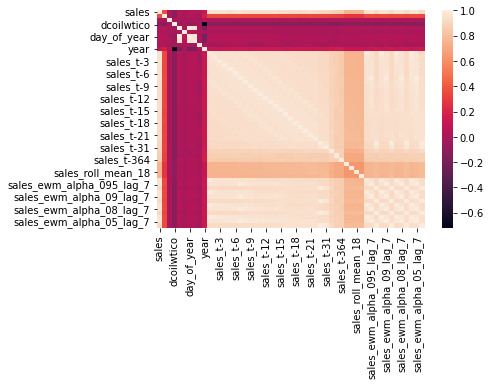

In [ ]:
sns.heatmap(corr)

In [ ]:
Y = X['sales']
X = X.drop(['sales', 'year'], axis=1)
X_test = X_test.drop(['sales'], axis=1)

In [ ]:
X.shape, Y.shape, X_test.shape

((2352240, 57), (2352240,), (28512, 57))

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 61 kB/s 


In [ ]:
import catboost as cb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.dtypes

store_nbr                     category
family                        category
onpromotion                      int64
cluster                       category
holiday_type                  category
locale                        category
description                   category
transferred                       bool
dcoilwtico                     float64
month                            int64
day_of_month                     int64
day_of_year                      int64
week_of_year                     int64
day_of_week                      int64
sales_t-1                      float64
sales_t-2                      float64
sales_t-3                      float64
sales_t-4                      float64
sales_t-5                      float64
sales_t-6                      float64
sales_t-7                      float64
sales_t-8                      float64
sales_t-9                      float64
sales_t-10                     float64
sales_t-11                     float64
sales_t-12               

In [ ]:
def recursive_predict(model):
    global X_test
    output = np.array([])
    for day in range(16, 32):
        pred = model.predict(X_test.query(f"day_of_month == {day}"))
        pred[pred < 0] = 0
        output = np.concatenate([output, pred], axis=0)
        for k in range(day+1, 32):
            X_test.loc[X_test[X_test["day_of_month"] == k].index, f"sales_t-{k-day}"] = pred
    return output

In [ ]:
lgb_params = {
    'metric': 'mse',
    'boosting_type' : 'gbdt',
    'num_leaves': 8,
    'learning_rate': 0.2,
    'max_depth': 7,
    'verbose': 0,
    'num_boost_round': 5000,
    'early_stopping_rounds': 200,
    'nthread': -1,
    'force_col_wise': True,
}

train_dataset = lgb.Dataset(data=X_train, label=Y_train, feature_name='auto')
val_dataset = lgb.Dataset(data=X_val, label=Y_val, reference=train_dataset, feature_name='auto')

In [ ]:
model = lgb.train(
    params=lgb_params, 
    train_set=train_dataset,
    valid_sets=[train_dataset, val_dataset],
    verbose_eval=100,
)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's l2: 0.174308	valid_1's l2: 0.176793
[200]	training's l2: 0.161478	valid_1's l2: 0.164441
[300]	training's l2: 0.154429	valid_1's l2: 0.157906
[400]	training's l2: 0.15022	valid_1's l2: 0.153895
[500]	training's l2: 0.147	valid_1's l2: 0.150887
[600]	training's l2: 0.144501	valid_1's l2: 0.148659
[700]	training's l2: 0.142603	valid_1's l2: 0.14698
[800]	training's l2: 0.140858	valid_1's l2: 0.14571
[900]	training's l2: 0.139477	valid_1's l2: 0.144657
[1000]	training's l2: 0.138008	valid_1's l2: 0.143548
[1100]	training's l2: 0.136763	valid_1's l2: 0.142562
[1200]	training's l2: 0.135716	valid_1's l2: 0.141847
[1300]	training's l2: 0.13472	valid_1's l2: 0.141163
[1400]	training's l2: 0.133897	valid_1's l2: 0.140667
[1500]	training's l2: 0.133121	valid_1's l2: 0.140201
[1600]	training's l2: 0.132328	valid_1's l2: 0.139778
[1700]	training's l2: 0.13161	valid_1's l2: 0.139362
[1800]	training's l2: 0.130923	valid

In [ ]:
Y_val_pred = model.predict(X_val, num_iteration=model.best_iteration)
Y_val_pred[Y_val_pred < 0] = 0
print(np.sqrt(mean_squared_error(Y_val, Y_val_pred)))
print(mean_squared_log_error(np.expm1(Y_val), np.expm1(Y_val_pred)))

0.36622513962844994
0.13412085289587766


In [ ]:
rec_pred_lgb = recursive_predict(model)

In [ ]:
X_test = all_df.query("date > '2017-08-15'")
X_test.drop(['date', 'year', 'sales'], inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
cat_indices = np.where(X_train.dtypes == 'category')[0]
train_dataset_cb = cb.Pool(X_train, Y_train, cat_features=cat_indices)
val_dataset_cb = cb.Pool(X_val, Y_val, cat_features=cat_indices)

model_cb = CatBoostRegressor(
    loss_function='RMSE',
    cat_features=cat_indices,
    max_depth=7,
    n_estimators=100
)
model_cb.fit(train_dataset_cb, eval_set=val_dataset_cb)

Learning rate set to 0.5
0:	learn: 1.4628983	test: 1.4626866	best: 1.4626866 (0)	total: 1.98s	remaining: 3m 15s
1:	learn: 0.8812822	test: 0.8823942	best: 0.8823942 (1)	total: 3.42s	remaining: 2m 47s
2:	learn: 0.6365314	test: 0.6379357	best: 0.6379357 (2)	total: 4.78s	remaining: 2m 34s
3:	learn: 0.5459554	test: 0.5476304	best: 0.5476304 (3)	total: 6.38s	remaining: 2m 33s
4:	learn: 0.5151817	test: 0.5170111	best: 0.5170111 (4)	total: 7.83s	remaining: 2m 28s
5:	learn: 0.5005485	test: 0.5025834	best: 0.5025834 (5)	total: 9.15s	remaining: 2m 23s
6:	learn: 0.4891149	test: 0.4910767	best: 0.4910767 (6)	total: 10.5s	remaining: 2m 19s
7:	learn: 0.4818291	test: 0.4835570	best: 0.4835570 (7)	total: 11.9s	remaining: 2m 16s
8:	learn: 0.4754522	test: 0.4771843	best: 0.4771843 (8)	total: 13.2s	remaining: 2m 13s
9:	learn: 0.4706879	test: 0.4728408	best: 0.4728408 (9)	total: 14.6s	remaining: 2m 11s
10:	learn: 0.4649663	test: 0.4671142	best: 0.4671142 (10)	total: 16.8s	remaining: 2m 15s
11:	learn: 0.460

In [ ]:
Y_val_pred_cb = model_cb.predict(X_val)
Y_val_pred_cb[Y_val_pred_cb < 0] = 0
print(np.sqrt(mean_squared_error(Y_val, Y_val_pred_cb)))
print(mean_squared_log_error(np.expm1(Y_val), np.expm1(Y_val_pred_cb)))

0.3989869638511494
0.1591905973231584


In [ ]:
rec_pred_cb = recursive_predict(model_cb)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
X_test = all_df.query("date > '2017-08-15'")
X_test.drop(['date', 'year', 'sales'], inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
solution = pd.DataFrame({'id': test_id, 'sales': np.expm1(rec_pred_lgb)})
solution.to_csv('submission.csv', index=False)